In [1]:
import json, os
from functional import seq
from fn import _
import requests as r

In [2]:
data = {                                                                                      
  "fields" : ["content"],                                                                                                         
  "offsets" : True,                                                                                         
  "positions" : True,                                                                                                                                                                                                                                                          
  "term_statistics" : True,                                       
  "field_statistics" : True                                                                                                                                                                                                                                                    
}   

def get_termvectors(doc_id):
    url = "http://localhost:9200/law_index6/_doc/{}/_termvectors".format(doc_id)
    response = r.post(url,json=data)
    return json.loads(response.content)


In [31]:
def frequency_extractor(term_dict):
    return term_dict['term_freq']

def body_to_freqs(body): #Sequence[str,int]
    return seq(body['term_vectors']['content']['terms'].items())\
        .filter(lambda x: x[0].isalpha())\
        .map(lambda x: (x[0],frequency_extractor(x[1])))

In [32]:
def get_freqs(doc_id): #Sequence[Term,Ocurrences]
    body = get_termvectors(doc_id)
    return body_to_freqs(body)

# Get docs from index 

In [33]:
def get_ids():
    match_all_query = {
      "query": {
        "match_all": {}
      },
        "size":1200,
      "_source": "_id"
    }

    resp = r.post("http://localhost:9200/law_index6/_search",json=match_all_query)
    hits = resp.json()['hits']['hits']
    return seq(hits).map(lambda x: x['_id'])

In [37]:
ids = get_ids()
allIds = ids\
.flat_map(lambda ajdi: get_freqs(ajdi))\
.group_by(lambda x:x[0])\
.map(lambda group: (
    group[0],
    seq(group[1]).map(lambda x:x[1]).sum()
))

allIds

a,17057
administracja,3047
arta,30992
artykuł,53912
bar,6895
bardzo,6943
bieżący,7296
brzmienie,17975
brzmieć,17977
budownictwo,482


In [38]:
allIds.order_by(lambda x: -x[1])

w,189995
wiek,188681
i,90377
z,88444
ojciec,65253
ocean,65202
o,65201
do,61002
artykuł,53912
usta,53705


In [39]:
frequency_list = allIds.filter(lambda x:x[0].isalpha() and len(x[0])>=2)

In [41]:
frequency_list.order_by(lambda x:-x[1])

wiek,188681
ojciec,65253
ocean,65202
do,61002
artykuł,53912
usta,53705
na,50809
który,49562
on,49331
się,46522


[Text(0,0,'wiek'),
 Text(0,0,'ojciec'),
 Text(0,0,'ocean'),
 Text(0,0,'do'),
 Text(0,0,'artykuł'),
 Text(0,0,'usta'),
 Text(0,0,'na'),
 Text(0,0,'który'),
 Text(0,0,'on'),
 Text(0,0,'się'),
 Text(0,0,'numer'),
 Text(0,0,'lub'),
 Text(0,0,'lubić'),
 Text(0,0,'pozycja'),
 Text(0,0,'rok'),
 Text(0,0,'oraz'),
 Text(0,0,'być'),
 Text(0,0,'arta'),
 Text(0,0,'mowa'),
 Text(0,0,'dzień'),
 Text(0,0,'ten'),
 Text(0,0,'ustawa'),
 Text(0,0,'nie'),
 Text(0,0,'przez'),
 Text(0,0,'punkt'),
 Text(0,0,'określić'),
 Text(0,0,'brzmieć'),
 Text(0,0,'brzmienie'),
 Text(0,0,'przepis'),
 Text(0,0,'móc')]

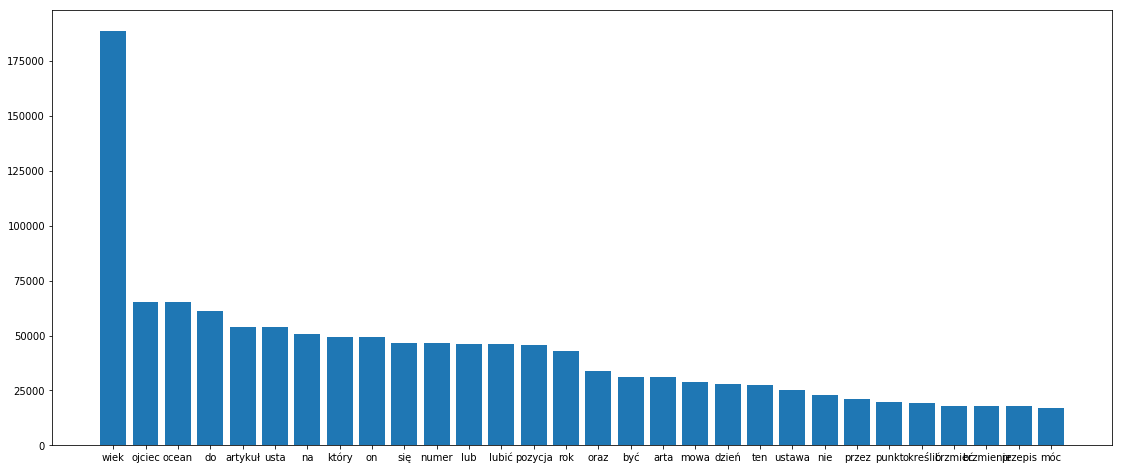

In [94]:
import pylab as pl

ordered = frequency_list.order_by(lambda x:x[0]).order_by(lambda x:-x[1]).take(30)

labels = ordered.map(lambda x:x[0] ).to_list()
values = ordered.map(lambda x:x[1] ).to_list()

fig = pl.figure()
fig.set_figheight(8)
fig.set_figwidth(19)
ax = pl.subplot(111)
ax.bar(labels, values)
ax.set_xticklabels(labels)
# for rect, label in zip(ax.patches, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
#             ha='center', va='bottom')


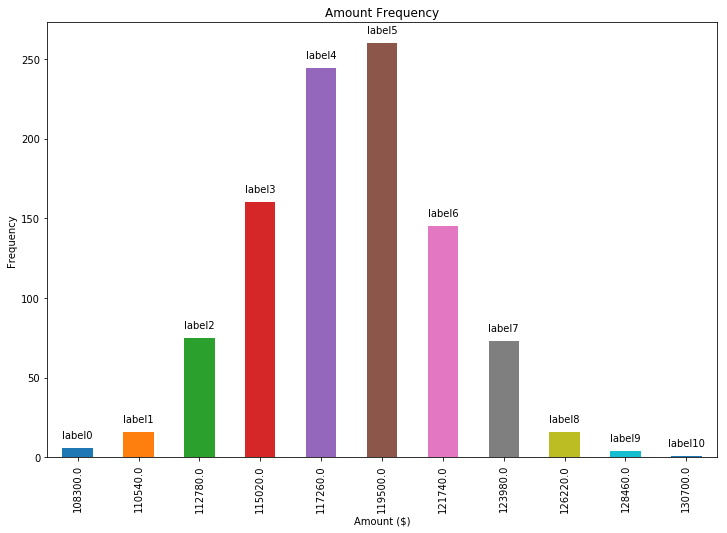

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that, 
# so for consistency I create a series from the list.
freq_series = pd.Series.from_array(frequencies)

x_labels = [108300.0, 110540.0, 112780.0, 115020.0, 117260.0, 119500.0,
            121740.0, 123980.0, 126220.0, 128460.0, 130700.0]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Amount Frequency')
ax.set_xlabel('Amount ($)')
ax.set_ylabel('Frequency')
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = ["label%d" % i for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

# Using polimorfologik 

In [58]:
polish_dict = seq.csv("polimorfologik/polimorfologik-2.1.txt").map(lambda x : x[0])

In [63]:
def extract_names(row):
    split = row.split(";",2)
    return [split[0],split[1]]

In [69]:
words = polish_dict\
    .flat_map(extract_names)\
    .map(lambda x: x.lower())\
    .filter(lambda x: x.isalpha())\
    .distinct()